In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Utility functions

# Calculate gini coeficient 
def gini(w):
    N = w.size
    w = np.sort(w)
    G = 2*np.sum(np.arange(1,N+1)*w)/(N*np.sum(w)) - (1+1/N)
    return G

# Calculate the proportion of people who moved by more than one quintile
def mobility(v,w):
    vbins = np.percentile(v,[0,20,40,60,80,100])
    wbins = np.percentile(w,[0,20,40,60,80,100])
    vinds = np.digitize(v,vbins)
    winds = np.digitize(w,wbins)
    changes = np.absolute(winds-vinds)
    return (np.sum(changes>1))/len(v)

# Advanced kinetic exchange
def kinetic_exchange(v,w):
    R = np.random.random(size=v.size)
    delta = R*np.minimum(v,w)
    v+=delta
    w-=delta
    return (v,w)

# Pairing
def pairs(N):
    arr = np.arange(N)
    np.random.shuffle(arr)
    return (arr[:int(N/2)],arr[int(N/2):])

# wealth exchange once
def kin_exchange_world(world):
    vindex,windex = pairs(1000)
    newv,neww = kinetic_exchange(world[vindex],world[windex])
    world[vindex] = newv
    world[windex] = neww
    return world

# Iteration
def iterate_once(world,incomes,capreturn_econgrowth_ratio,kin_exchange_flag=True):
    total_wealth = np.sum(world)
    total_econgrowth = np.sum(incomes)
    capreturn = total_econgrowth*capreturn_econgrowth_ratio
    growth_factor = capreturn/total_econgrowth
    world *= growth_factor
    world += incomes
    if(kin_exchange_flag):
        kin_exchange_world(world)
    wealth_normalization(world)
    return world

# Normalise 
def wealth_normalization(world):
    totalwealth = np.sum(world)
    if totalwealth>10000:
        world *= (10000/totalwealth)
    return world


In [51]:
# Initialize data
# Per-timestep income of 1000 individuals 
incomes = np.random.normal(loc=0.5, scale=0.2,size=1000)
incomes[incomes<0]+=0.3
people_wealth = incomes.copy()
np.min(incomes)
# Growth due to income = sum(incomes)

0.015534223504810096

In [52]:
# Return on capital < Growth due to income

time_period = 500
ratioo = 0.7
world_1 = people_wealth.copy()
ginis_1 = []
for i in range(time_period):
    iterate_once(world_1,incomes,ratioo,kin_exchange_flag=True)
    ginis_1.append(gini(world_1.copy()))

mobility(people_wealth.copy(),world_1)

0.282

In [53]:
# Return on capital < Growth due to income

time_period = 500
ratioo = 20
world_2 = people_wealth.copy()
ginis_2 = []
for i in range(time_period):
    iterate_once(world_2,incomes,ratioo,kin_exchange_flag=True)
    ginis_2.append(gini(world_2.copy()))

mobility(people_wealth.copy(),world_2)

0.356

In [54]:
# Return on capital = Growth due to income

time_period = 500
ratioo = 1
world_3 = people_wealth.copy()
ginis_3 = []
for i in range(time_period):
    iterate_once(world_3,incomes,ratioo,kin_exchange_flag=True)
    ginis_3.append(gini(world_3.copy()))

mobility(people_wealth.copy(),world_3)

0.341

Text(0.5, 0.98, 'Gini coefficient for different scenarios')

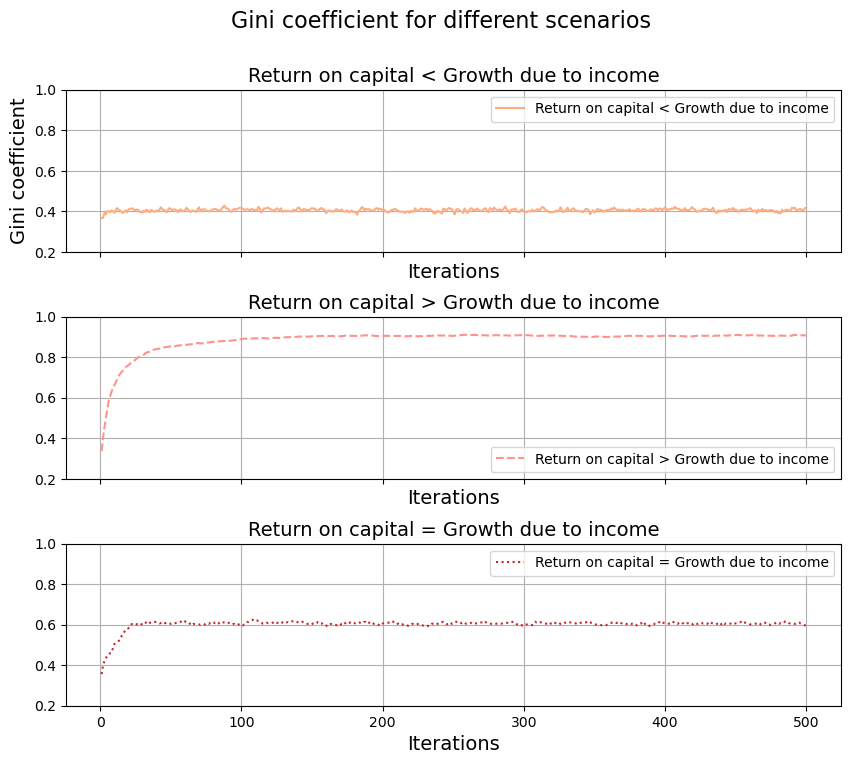

In [64]:
fig, axes = plt.subplots(3,1,sharex=True,sharey=True, figsize=(10,8))

axes[0].plot(np.arange(1,501),ginis_1, color='#FFAC81', linestyle='-', label='Return on capital < Growth due to income')
axes[1].plot(np.arange(1,501),ginis_2, color='#FF928B', linestyle='--', label='Return on capital > Growth due to income')
axes[2].plot(np.arange(1,501),ginis_3, color='#C1292E', linestyle=':', label='Return on capital = Growth due to income')

axes[0].set_ylim([0.2,1])
axes[0].set_yticks(np.arange(0.2, 1.2, 0.2))
plt.subplots_adjust(hspace=0.4)

axes[0].set_title("Return on capital < Growth due to income", fontsize=14)
axes[1].set_title("Return on capital > Growth due to income", fontsize=14)
axes[2].set_title("Return on capital = Growth due to income", fontsize=14)

axes[0].set_xlabel("Iterations", fontsize=14)
axes[1].set_xlabel("Iterations", fontsize=14)
axes[2].set_xlabel("Iterations", fontsize=14)

axes[0].set_ylabel("Gini coefficient", fontsize=14)

axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

axes[0].legend()
axes[1].legend()
axes[2].legend()

fig.suptitle("Gini coefficient for different scenarios", fontsize=16)
